# **Importing all necessary library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Overwiewing the data**

In [3]:
df=pd.read_csv('Walmart.csv')

In [6]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


# **Applying EDA**

In [9]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [15]:
df["Date"] = pd.to_datetime(df["Date"],format="%d-%m-%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [17]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


**Checking outlier**


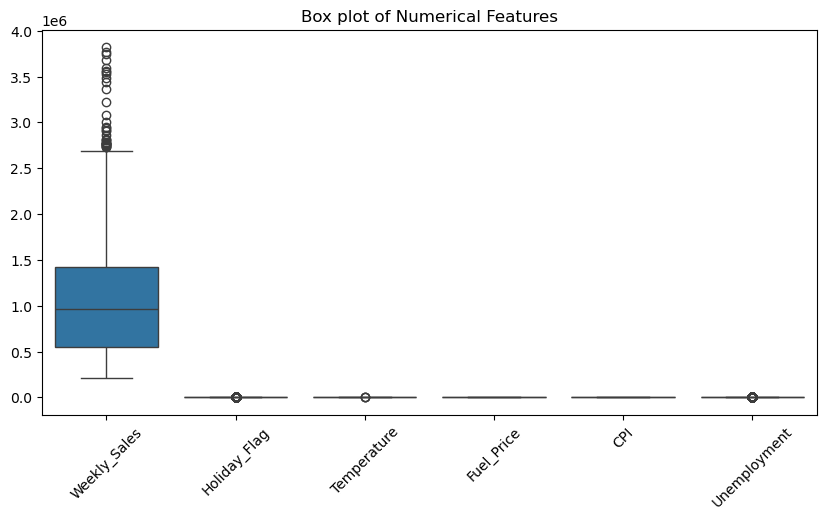

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df.drop(columns=['Store', 'Date']))
plt.title('Box plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [22]:
# checking correlation between Weekly_Sales and Unemployment
def check_correlation(coloum_1,coloum_2):
    correlation=coloum_1.corr(coloum_2)
    return correlation

correlated=check_correlation(df['Weekly_Sales'],df['Unemployment'])
print("Pearson Correlation Coefficient:", correlated)

Pearson Correlation Coefficient: -0.10617608965795416


In [24]:
# If Weekly_sales have correlation with Unemployment then all affected store will be stored in affect_store
if abs(correlated) > 0.1:
    print("There is a strong positive correlation between 'Weekly_Sales' and 'Unemployment'.")
    mean_val=7
    affect_store=[]
    for store, unemployment in zip(df["Store"], df["Unemployment"]):
      if unemployment >= mean_val:
        affect_store.append(store)

else:
    print("There is no strong correlation between 'Weekly_Sales' and 'Unemployment'.")

There is a strong positive correlation between 'Weekly_Sales' and 'Unemployment'.


In [26]:
affect_store

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [28]:
# Check for correlation between temperature and weekly sales
correlated2=check_correlation(df['Weekly_Sales'],df['Temperature'])
print("Pearson Correlation Coefficient (Temperature vs. Weekly Sales):",correlated2 )

if abs(correlated2) > 0.1:
    print("Yes temprature affect Weekly_Sales")
else:
    print("Temprature does not afffect Weekly_Sales")

Pearson Correlation Coefficient (Temperature vs. Weekly Sales): -0.06381001317946958
Temprature does not afffect Weekly_Sales


In [30]:
correlated3=check_correlation(df['Weekly_Sales'],df['CPI'])
print("Pearson Correlation Coefficient (CPI vs. Weekly Sales):",correlated3 )

if abs(correlated3) > 0.1:
    print("Yes CPI affect Weekly_Sales")

    sns.lineplot(x=df["Weekly_Sales"],y=df["Store"])
    plt.show()

else:
  print("CPI doesent affect Weekly_Sales")

Pearson Correlation Coefficient (CPI vs. Weekly Sales): -0.07263416204017625
CPI doesent affect Weekly_Sales


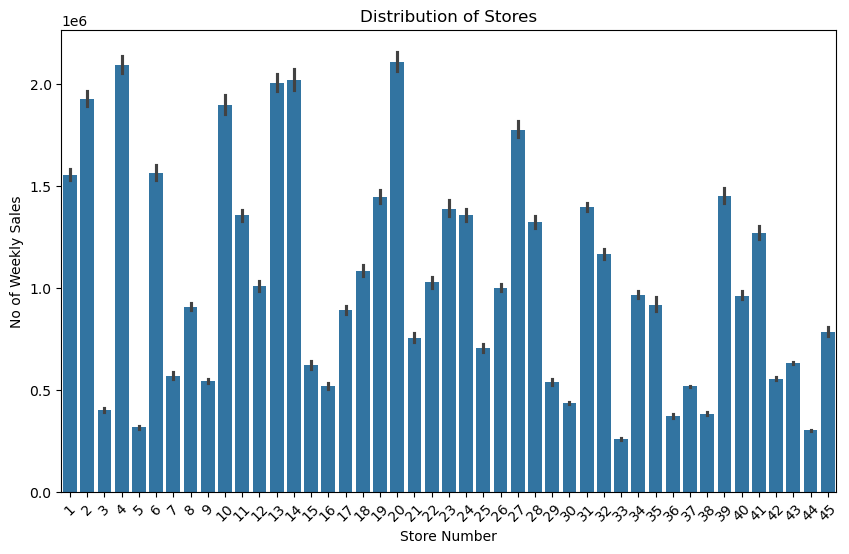

In [32]:
# Checking the relation-ship between Weekly_Sales and Stores
plt.figure(figsize=(10, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=df)
plt.title('Distribution of Stores')
plt.xlabel('Store Number')
plt.ylabel('No of Weekly Sales')
plt.xticks(rotation=45)
plt.show()

In [34]:
#Checking Top 5 performing stores according to the historical data.
grouped = df.groupby('Store')['Weekly_Sales'].sum()
grouped = grouped.sort_values(ascending=False)
grouped.head(5)

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64

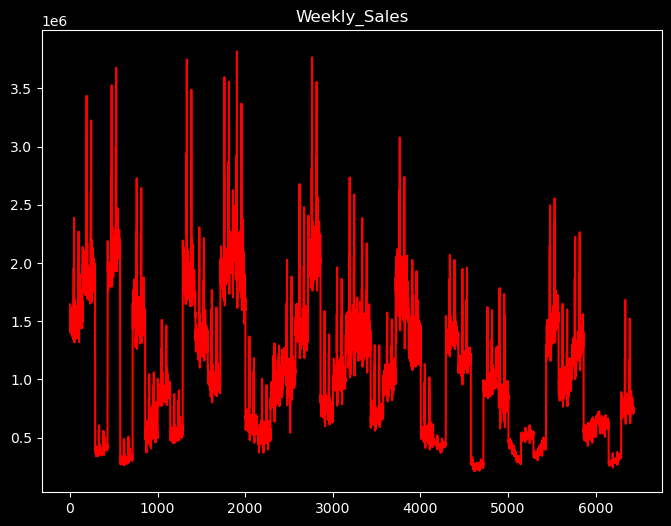

In [36]:
# Using predictive modeling techniques to forecast the sales for each store for the next 12 weeks
plt.style.use("dark_background")
plt.figure(figsize=(8,6))
plt.plot(df['Weekly_Sales'],color="red")
plt.title("Weekly_Sales")
plt.show()

In [38]:
def helper_check(data):
  # Rolling mean for the 1 year timeframe
  from statsmodels.tsa.stattools import adfuller
  rolling_mean = data.rolling(window = 12).mean()

  # Rolling std for the 1 year timeframe
  rolling_std = data.rolling(window = 12).std()

  original_data = plt.plot(data, color = "red", label = "Original Data")
  mean_data = plt.plot(rolling_mean, color = "yellow", label = "Rolling mean")
  std_data = plt.plot(rolling_std, color = "blue", label = "Rolling Std")
  plt.legend()
  plt.plot()

  results = adfuller(data)
  print(f"P-value: {results[1]}")

  if results[1] > 0.05:
    return"The data is not stationary"
  else:
    return "The data is stationary"

P-value: 0.00011655869699901148


'The data is stationary'

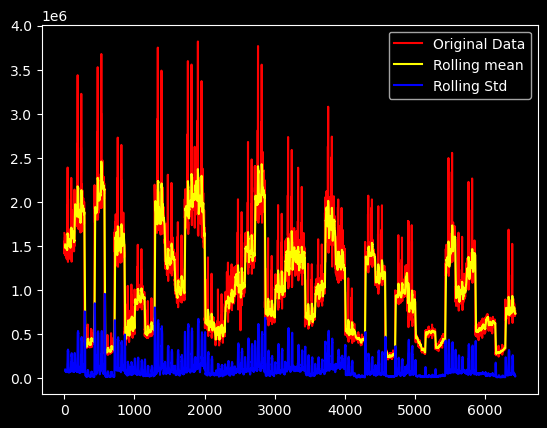

In [40]:
helper_check(df['Weekly_Sales'])

In [42]:
df_log = np.log(df['Weekly_Sales'])

P-value: 5.885871481097517e-05


'The data is stationary'

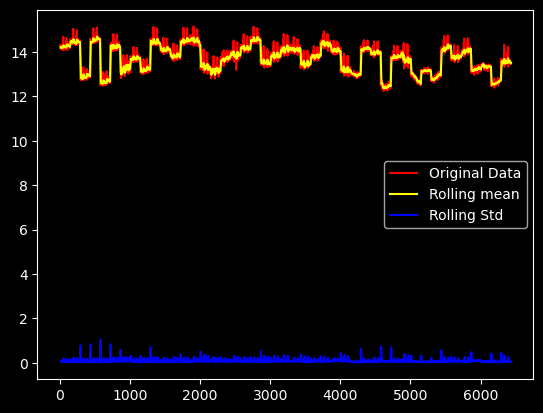

In [44]:
helper_check(df_log)

In [46]:
df_diff = df_log.diff().dropna()

P-value: 5.291989409319677e-26


'The data is stationary'

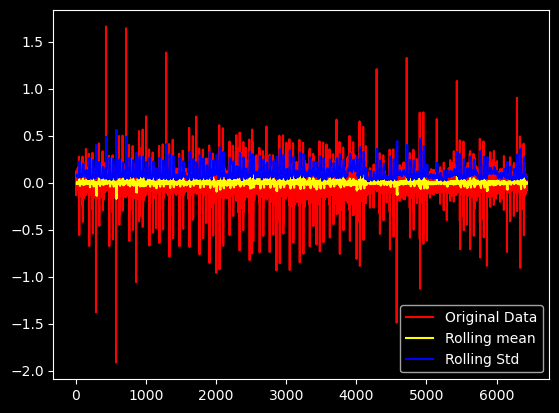

In [48]:
helper_check(df_diff)

In [50]:
df_diff

1      -0.001055
2      -0.018433
3      -0.134059
4       0.097955
5      -0.077026
          ...   
6430   -0.013803
6431    0.028041
6432    0.001375
6433   -0.022497
6434    0.057044
Name: Weekly_Sales, Length: 6434, dtype: float64

In [52]:
!pip install pmdarima
import itertools
from sklearn.metrics import *
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

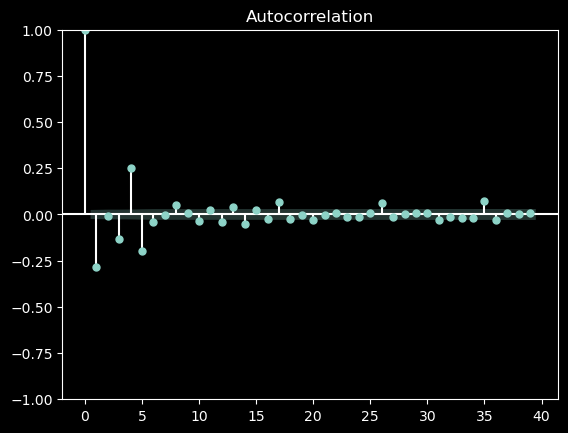

In [53]:
plot_acf(df_diff)
plt.show()
plt.close()

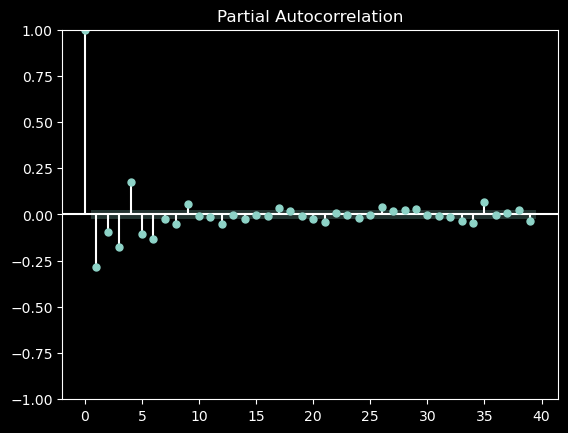

In [54]:
plot_pacf(df_diff)
plt.show()
plt.close()

In [58]:
model = auto_arima(
    df_diff,     # Data
    test = "adf",     # Test for stationarity
    start_p = 0,      # P (AR Value)
    start_q = 0,      # Q (MA values)
    seasonal = True,
    D = 0,
    max_p = 12,      # Max P (AR Value)
    max_q = 12,      # Max Q (MA Value)
    # suppress_warnings = True,   # Ignoring the warnings
    error_action = "ignore",    # Working on the errors
    stepwise = True, trace = True  # Output and step by step output
)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-7092.446, Time=1.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-7625.756, Time=1.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-7732.434, Time=2.74 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-7094.441, Time=0.37 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-7750.944, Time=2.95 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-7771.088, Time=6.15 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-7681.976, Time=1.84 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-8047.660, Time=11.72 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-7887.148, Time=0.96 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-8113.556, Time=7.64 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-8085.322, Time=1.35 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-8250.339, Time=18.72 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-8158.634, Time=1.52 sec
 ARIMA(6,0,1)(0,0,0)[0] intercept   : AIC=-8272.813, Time=17.53 sec
 ARIMA(6,0,0)(0,

In [66]:
model = ARIMA(df_diff, order = (11,0,3))

C:\Users\jrajv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jrajv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jrajv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [68]:
results = model.fit()

C:\Users\jrajv\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


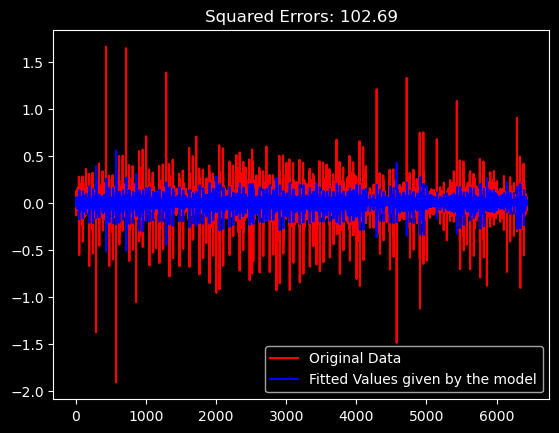

In [69]:
plt.plot(df_diff, label = "Original Data", color = "red")
plt.plot(results.fittedvalues, label = "Fitted Values given by the model", color = "blue")
plt.title("Squared Errors: %.2f"%sum((results.fittedvalues - df_diff)**2))  # (Y_pred - y_act)**2

plt.legend() # It for printing the label on the graph
plt.show()

In [72]:
pred = results.predict(1,6435+12)

C:\Users\jrajv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [74]:
# convert pred data into original formate

pred_diff_inverted = pred.cumsum()  # Cumulative sum to reverse differencing

base_value = df_log.iloc[-1]  # Take the last value of the logged data

pred_log_inverted = pred_diff_inverted + base_value

pred_original_scale = np.exp(pred_log_inverted)

pred_original_scale

1       760456.908771
2       764900.406994
3       802151.567882
4       793947.624405
5       813160.120722
            ...      
6443    774027.359250
6444    771819.617787
6445    770454.848038
6446    770491.677632
6447    769721.763044
Name: predicted_mean, Length: 6447, dtype: float64

[]

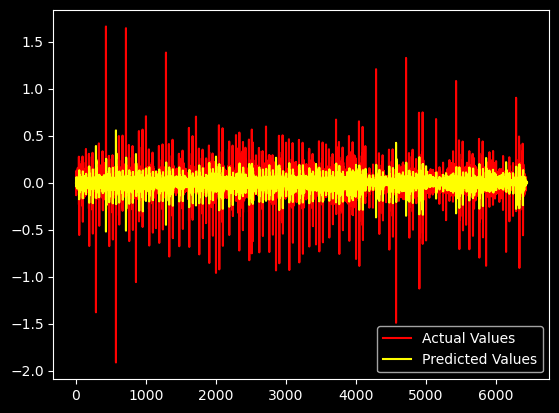

In [76]:
plt.plot(df_diff, color = "red", label = "Actual Values")
plt.plot(pred, color = "yellow", label = "Predicted Values")
plt.legend()
plt.plot()